# Preparing DataFrame

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_view = pd.read_csv('./LIWC-22 Results - translated_text_with_other_dat___ - LIWC Analysis.csv', 
                      encoding='utf-8-sig').rename(columns={
    'gender':'Gender', 'location':'Location', 'time_1':'Time', 'gender_label':'Category'})

def changeGenderLabel(label):
    if label == 0:
        return 'Crime-related'
    elif label == 1:
        return 'Gender-related'
    else:
        return 'Irrelevant or Ineffective'

def changeGender(gender):
    if gender == 'f':
        return 'Woman'
    else:
        return 'Man'

df_view['Category'] = list(map(changeGenderLabel, df_view['Category'].tolist()))
df_view['Gender'] = list(map(changeGender, df_view['Gender'].tolist()))

# Seaborn Visual Settings

In [2]:
sns.set_style("darkgrid")
category_palette = {
    'Crime-related':'#66c2a5',
    'Gender-related':'#fc8d62',
    'Irrelevant or Ineffective':'#8da0cb'
}
gender_palette = {
    'Man':'#f1a340',
    'Woman':'#998ec3'
}

# Draw - Distribution - Summary Dimensions

In [14]:
# sns.displot(df_view, x="WC", hue="Category", kind="ecdf", palette=category_palette).fig.set_size_inches(5,2.5)

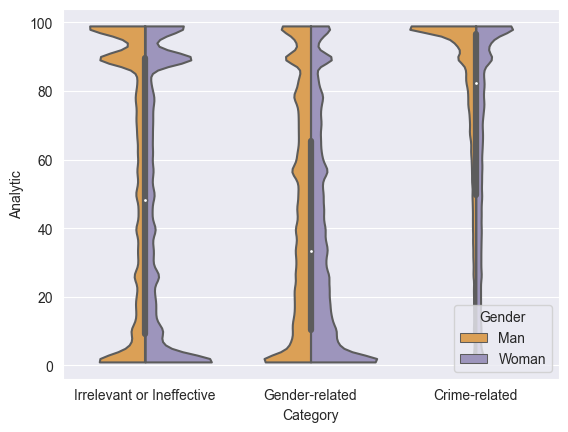

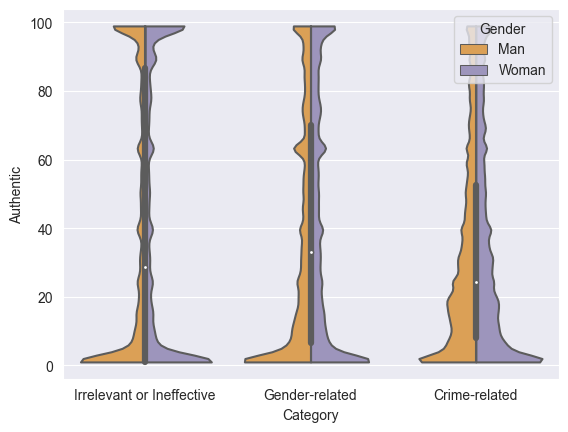

In [231]:
sns.set_style("darkgrid")

sns.violinplot(data=df_view, x="Category", y="Analytic", hue="Gender", split=True, 
               palette=gender_palette, bw=.05, cut=0)
               # when do not normalize by setting scale='count', heights are ratios, which is correct
plt.show()
# sns.violinplot(data=df_view, x="Clout", y="Category", hue="Gender", split=True, 
#                palette=gender_palette, bw=.05, cut=0)
# plt.show()
sns.violinplot(data=df_view, x="Category", y="Authentic", hue="Gender", split=True, 
               palette=gender_palette, bw=.05, cut=0)
plt.show()
# sns.violinplot(data=df_view, x="Tone", y="Category", hue="Gender", split=True, 
#                palette=gender_palette, bw=.05, cut=0)
# plt.show()

# Draw - Distribution - Non-summary Dimensions

In [6]:
import numpy as np
from scipy import stats
import statistics as stat
import math

In [4]:
df_m = df_view[df_view['Gender']=='Man']
df_f = df_view[df_view['Gender']=='Woman']

df_c = df_view[df_view['Category']=='Crime-related']
df_g = df_view[df_view['Category']=='Gender-related']
df_i = df_view[df_view['Category']=='Irrelevant or Ineffective']

In [38]:
measure = 'cogproc'

m = [x for x in df_m[measure] if not math.isnan(x)]
f = [x for x in df_f[measure] if not math.isnan(x)]

c = [x for x in df_c[measure] if not math.isnan(x)]
g = [x for x in df_g[measure] if not math.isnan(x)]
i = [x for x in df_i[measure] if not math.isnan(x)]

In [39]:
print(measure)
print('Male Mdn: ', stat.median(m))
print('Male SD: ', stat.stdev(m), '\n')

print('Female Mdn: ', stat.median(f))
print('Female SD: ', stat.stdev(f), '\n')

print('Crime Mdn: ', stat.median(c))
print('Crime SD: ', stat.stdev(c), '\n')

print('Gender Mdn: ', stat.median(g))
print('Gender SD: ', stat.stdev(g), '\n')

print('I&I Mdn: ', stat.median(i))
print('I&I SD: ', stat.stdev(i), '\n')

print("Gender: ", stats.ks_2samp(c, g))
print("Gender: ", stats.ks_2samp(m, f))

cogproc
Male Mdn:  9.34
Male SD:  9.249498120483054 

Female Mdn:  10.53
Female SD:  10.989282948242566 

Crime Mdn:  9.52
Crime SD:  5.961068260980089 

Gender Mdn:  11.43
Gender SD:  6.753679228378135 

I&I Mdn:  10.0
I&I SD:  12.038093994496034 

Gender:  KstestResult(statistic=0.13720595830028337, pvalue=0.0, statistic_location=11.33, statistic_sign=1)
Gender:  KstestResult(statistic=0.07549734436613798, pvalue=0.0, statistic_location=14.19, statistic_sign=1)


# Draw - Temporal Changes - Summary Dimensions

In [9]:
def formatTime(time):
    return time.split(',')[0].replace('2022/0', '')

In [10]:
ls_formattedTime = list(map(formatTime, df_view['Time'].tolist()))
ls_formattedTime[0:5]

['6/10', '6/10', '6/10', '6/10', '6/10']

In [11]:
df_view['Time'] = ls_formattedTime

**Next dropp posts (n=29) on 7/01**

In [12]:
df_view_June = df_view.drop(df_view[df_view['Time']=='7/01'].index.tolist())

**Observation**: Analytic score is negatively corelated with the next day's post volumn

However, after 6/22, post volumn remained unchange while the analytic score did.

Could possibly do regressions for each category's analytic score.

**Observation**: Tone seems to corelate with the next day's post volumn.

And, there's a significant tone drop from 6/22 to 6/24. (censorship?)

# Mann-Kendall tests for Trends

In [2]:
import numpy as np
import pymannkendall as mk
import statistics as stat

In [13]:
df_crime_June = df_view_June[df_view_June['Category']=='Crime-related']
df_gender_June = df_view_June[df_view_June['Category']=='Gender-related']
df_other_June = df_view_June[df_view_June['Category']=='Irrelevant or Ineffective']

In [14]:
ls_categories = df_view.columns.tolist()[9:]

In [16]:
# Full June series + full data

for cat in ls_categories:
    ls = df_view_June[['Time', cat]].groupby(['Time']).median()
    series = ls[cat].tolist()
    
    res = mk.original_test(series, alpha=0.05)
    
    if res.h == False:
        continue
    if res.p < 0.001:
        p = '***'
    elif res.p < 0.01:
        p = '**'
    elif res.p < 0.05:
        p = '*'
    print("{cat}, {trend}, {s}, {p}, {slope:.2f}".format(
        cat=cat, trend=res.trend, s=res.s, p=p, slope=res.slope))

Analytic, increasing, 85.0, *, 1.09
Authentic, increasing, 113.0, ***, 1.02
pronoun, decreasing, -112.0, ***, -0.21
ppron, decreasing, -123.0, ***, -0.23
ipron, decreasing, -95.0, **, -0.09
auxverb, decreasing, -75.0, *, -0.07
adverb, decreasing, -66.0, *, -0.04
conj, decreasing, -81.0, *, -0.07
Cognition, decreasing, -92.0, **, -0.14
cogproc, decreasing, -105.0, **, -0.19
Affect, decreasing, -92.0, **, -0.12
tone_neg, decreasing, -75.0, *, -0.16
Social, decreasing, -102.0, **, -0.24
socbehav, decreasing, -99.0, **, -0.13
socrefs, decreasing, -133.0, ***, -0.29
time, increasing, 72.0, *, 0.05
AllPunc, increasing, 77.0, *, 0.07


In [17]:
# Full June series + crime data

for cat in ls_categories:
    ls = df_crime_June[['Time', cat]].groupby(['Time']).median()
    series = ls[cat].tolist()
    
    res = mk.original_test(series, alpha=0.05)
    if res.h == False:
        continue
    if res.p < 0.001:
        p = '***'
    elif res.p < 0.01:
        p = '**'
    elif res.p < 0.05:
        p = '*'
    print("{cat}, {trend}, {s}, {p}, {slope:.2f}".format(
        cat=cat, trend=res.trend, s=res.s, p=p, slope=res.slope))

Analytic, increasing, 77.0, *, 0.44
Authentic, decreasing, -70.0, *, -0.34
Dic, decreasing, -87.0, **, -0.12
Linguistic, decreasing, -85.0, *, -0.21
function, decreasing, -88.0, **, -0.16
pronoun, decreasing, -109.0, **, -0.12
ipron, decreasing, -94.0, **, -0.07
det, decreasing, -79.0, *, -0.05
auxverb, decreasing, -72.0, *, -0.08
conj, increasing, 95.0, **, 0.05
verb, decreasing, -119.0, ***, -0.19
Drives, increasing, 85.0, *, 0.08
affiliation, increasing, 127.0, ***, 0.07
Cognition, decreasing, -87.0, **, -0.11
cogproc, decreasing, -117.0, ***, -0.15
insight, decreasing, -77.0, *, -0.07
discrep, decreasing, -92.0, **, -0.03
moral, decreasing, -77.0, *, -0.03
comm, increasing, 71.0, *, 0.02
work, increasing, 67.0, *, 0.04
Physical, decreasing, -79.0, *, -0.05
Perception, decreasing, -112.0, ***, -0.09
space, decreasing, -109.0, **, -0.06
time, increasing, 67.0, *, 0.03
Period, decreasing, -107.0, **, -0.04
Comma, decreasing, -79.0, *, -0.04


In [18]:
# Full June series + gender data

for cat in ls_categories:
    ls = df_gender_June[['Time', cat]].groupby(['Time']).median()
    series = ls[cat].tolist()
    
    res = mk.original_test(series, alpha=0.05)
    if res.h == False:
        continue
    if res.p < 0.001:
        p = '***'
    elif res.p < 0.01:
        p = '**'
    elif res.p < 0.05:
        p = '*'
    print("{cat}, {trend}, {s}, {p}, {slope:.2f}".format(
        cat=cat, trend=res.trend, s=res.s, p=p, slope=res.slope))

Analytic, increasing, 87.0, **, 0.80
pronoun, decreasing, -69.0, *, -0.16
ppron, decreasing, -67.0, *, -0.10
ipron, decreasing, -86.0, *, -0.05
Cognition, decreasing, -84.0, *, -0.10
cogproc, decreasing, -83.0, *, -0.08
insight, decreasing, -65.0, *, -0.06
cause, decreasing, -73.0, *, -0.04
tentat, decreasing, -87.0, **, -0.06
differ, decreasing, -69.0, *, -0.04
allure, increasing, 66.0, *, 0.06
focuspast, increasing, 66.0, *, 0.03
focuspresent, decreasing, -91.0, **, -0.06


In [128]:
# Full June series + other data

for cat in ls_categories:
    ls = df_other_June[['Time', cat]].groupby(['Time']).median()
    series = ls[cat].tolist()
    
    res = mk.original_test(series, alpha=0.01)
    if res.h == False:
        continue
    if res.p < 0.001:
        p = '**'
    elif res.p < 0.01:
        p = '*'
    print("{cat}, {trend}, {s}, {p}, {slope:.2f}".format(
        cat=cat, trend=res.trend, s=res.s, p=p, slope=res.slope))

*** Authentic: increasing, True, p=0.00027651391563821015, s=121.0, slope=1.8625892857142858
*** pronoun: decreasing, True, p=0.0014076500354436305, s=-106.0, slope=-0.19568181818181823
*** ppron: decreasing, True, p=0.004567783456862484, s=-93.0, slope=-0.16999999999999998
*** ipron: decreasing, True, p=0.007791560689893062, s=-89.0, slope=-0.09571428571428571
*** cogproc: decreasing, True, p=0.0033316785725916453, s=-98.0, slope=-0.16916666666666663
*** Affect: decreasing, True, p=0.002631151549069788, s=-100.0, slope=-0.2575367647058824
*** Social: decreasing, True, p=0.001102536960325473, s=-108.0, slope=-0.2794117647058823
*** socbehav: decreasing, True, p=0.005007675624197461, s=-92.0, slope=-0.1340625
*** socrefs: decreasing, True, p=0.0017866072195558136, s=-103.0, slope=-0.18125
*** AllPunc: increasing, True, p=0.0017454166761547985, s=103.0, slope=0.10483516483516497
